In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [29]:
data_f= pd.read_csv('framingham.csv', header=0)
data_f = data_f.dropna()
print(data_f.shape)
print(list(data_f.columns))

(3656, 16)
['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [56]:
data_f.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,glucose_332.0,glucose_348.0,glucose_368.0,glucose_370.0,glucose_386.0,glucose_394.0,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,...,0,0,0,0,0,0,0,0,0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,...,0,0,0,0,0,0,0,1,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,...,0,0,0,0,0,0,1,0,0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,...,0,0,0,0,0,0,0,0,1,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
data_f['TenYearCHD'].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

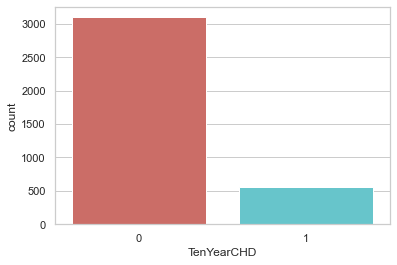

<Figure size 432x288 with 0 Axes>

In [14]:
sns.countplot(x='TenYearCHD',data=data_f, palette='hls')
plt.show()
plt.savefig('count_plot')

In [17]:
data_f.groupby('TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.424330,48.708938,2.007099,0.484995,8.758632,0.023879,0.004195,0.275895,0.020652,235.169732,130.280736,82.148919,25.642975,75.626331,80.620200
1,0.551167,54.278276,1.827648,0.511670,10.488330,0.066427,0.014363,0.509874,0.062837,246.350090,143.981149,87.157989,26.569838,76.310592,88.732496


In [22]:
data_f.groupby('male').mean()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
0,49.743854,1.963618,0.396755,5.497050,0.038348,0.005900,0.311209,0.025074,239.638151,133.265241,82.360619,25.519651,76.960177,81.791052,0.122911
1,49.323674,2.000000,0.604809,13.442663,0.020345,0.005549,0.311961,0.029593,233.405672,131.242910,83.603576,26.115912,74.188656,81.937731,0.189273


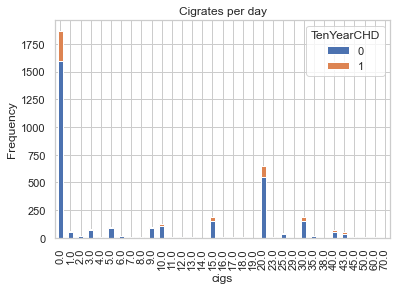

In [36]:
%matplotlib inline
pd.crosstab(data_f.cigsPerDay,data_f.TenYearCHD).plot(kind='bar', stacked= True)
plt.title('Cigrates per day')
plt.xlabel('cigs')
plt.ylabel('Frequency')
plt.savefig('cigs frequency')

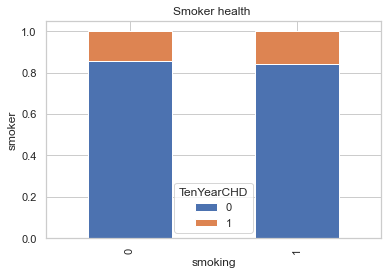

In [38]:
table=pd.crosstab(data_f.currentSmoker,data_f.TenYearCHD)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Smoker health ')
plt.xlabel('smoking')
plt.ylabel('smoker')
plt.savefig('smoker_heart')

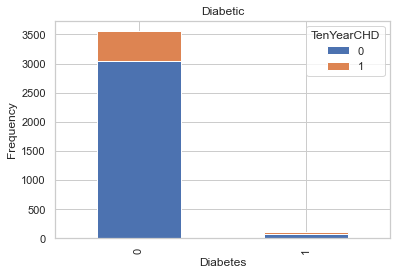

In [41]:
pd.crosstab(data_f.diabetes,data_f.TenYearCHD).plot(kind='bar', stacked=True)
plt.title('Diabetic')
plt.xlabel('Diabetes')
plt.ylabel('Frequency')
plt.savefig('Diabetec health')

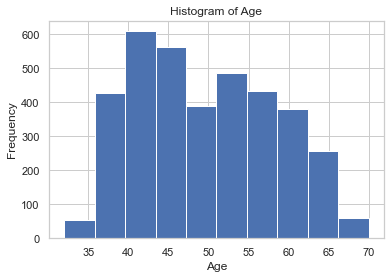

In [43]:
data_f.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

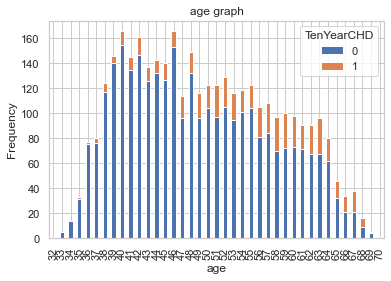

In [46]:
pd.crosstab(data_f.age,data_f.TenYearCHD).plot(kind='bar', stacked=True)
plt.title('age graph')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.savefig('age health')

C:\Users\heman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\heman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\heman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

IndexError: list index out of range

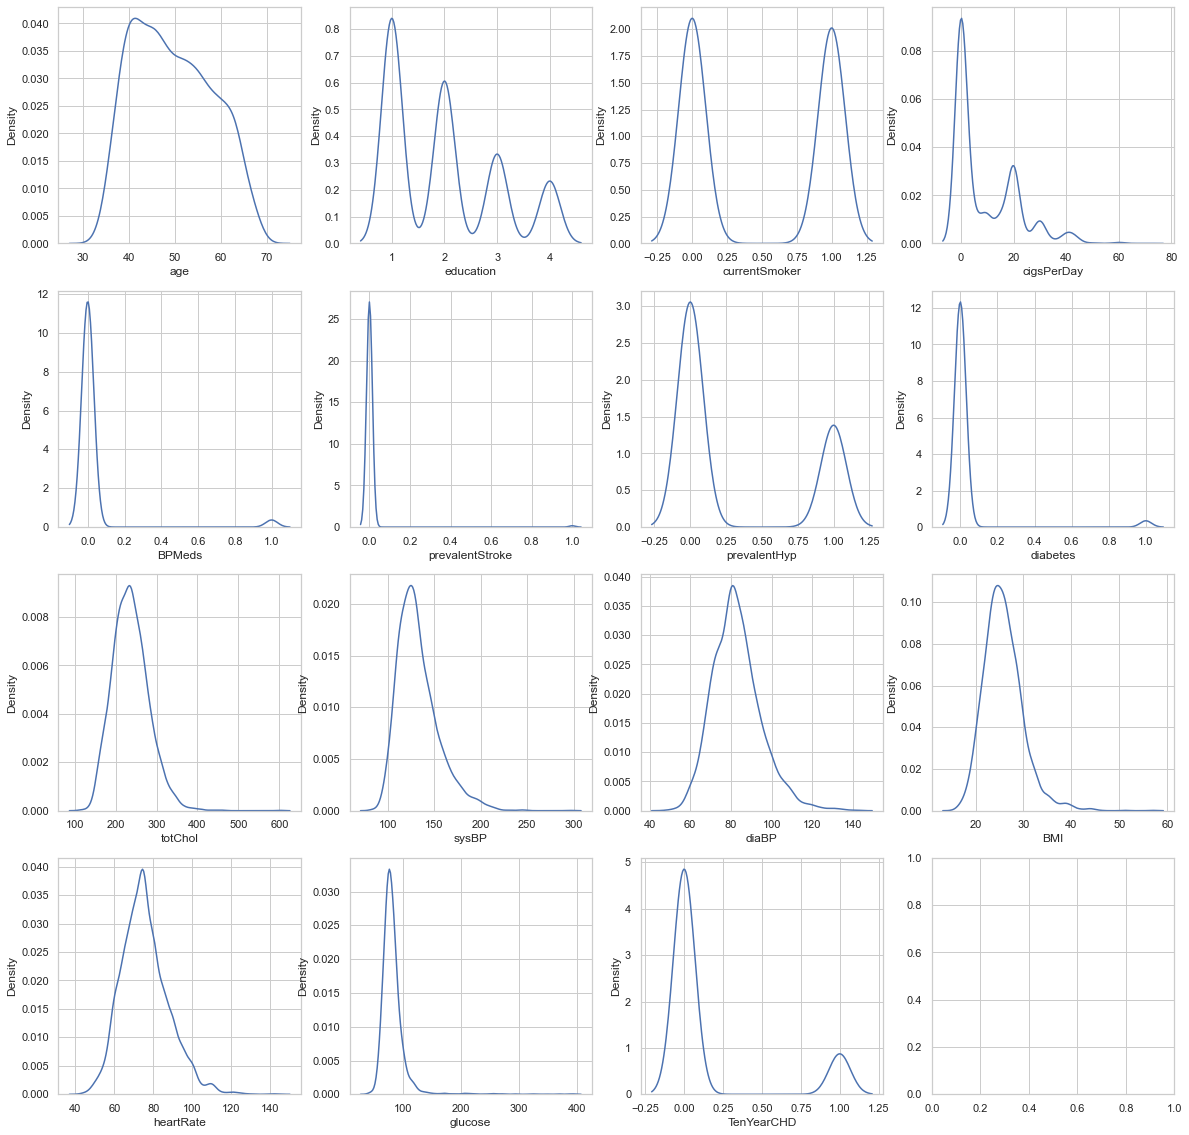

In [63]:
l=['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.distplot(data_f[l[i-1]],hist=False)

In [66]:
x = pd.DataFrame(data_f, columns = [ 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp','diabetes','totChol','sysBP', 'diaBP','BMI','heartRate'])
y = data_f['TenYearCHD'].values.reshape(-1, 1)
x

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate
0,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0
1,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0
2,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0
3,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0
4,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0
4232,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0
4233,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0
4234,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 0)

In [68]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\heman\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\heman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8510928961748634


In [73]:
logreg.intercept_

array([-0.48037812])

In [75]:
logreg.coef_

array([[ 3.02446368e-02, -1.94627185e-01, -2.88356547e-01,
         2.61038785e-02,  1.98656300e-01,  9.82468587e-02,
         9.80745499e-01,  3.40403960e-01, -5.69154573e-04,
         1.03256095e-02, -2.27637492e-02, -3.17876708e-02,
        -1.85624833e-02]])

In [76]:
logreg.predict_proba(x)

array([[0.95398108, 0.04601892],
       [0.94744101, 0.05255899],
       [0.86191118, 0.13808882],
       ...,
       [0.71484983, 0.28515017],
       [0.76014866, 0.23985134],
       [0.89363456, 0.10636544]])